# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# How muny class in Species

In [4]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Rename The Class , setosa=0 , versicolor =1 , virginica=2

In [5]:
label_encoder = preprocessing.LabelEncoder()
df['Species']= label_encoder.fit_transform(df['Species']) 
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [6]:
nulls = df.isnull().sum() 
nulls

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


<AxesSubplot:>

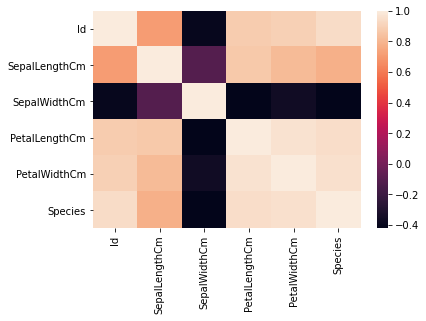

In [8]:
sns.heatmap(df.corr()) 

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


# The Model (Using K-mean)

Using the elbow method to find the optimal of clusters

In [12]:
X = df.iloc[:, [0, 1, 2, 3]].values

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i,init= 'k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graph To know the Elbow num / num of cluster

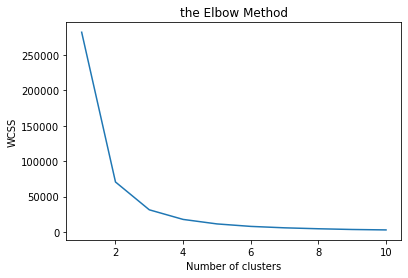

In [15]:
plt.plot(range(1,11), wcss)
plt.title('the Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From this We can Conclude that , The Number Of Class = 3

# Creating K-Means Classifier

In [16]:
kmeans=KMeans(n_clusters = 3,init= 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)

# visualize the outcomes to see what it has done.

<function matplotlib.pyplot.show(close=None, block=None)>

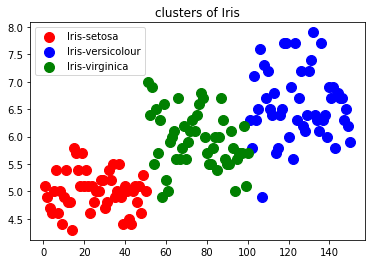

In [21]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')


plt.title('clusters of Iris')
plt.legend()
plt.show

# Plotting the centroids of the clusters

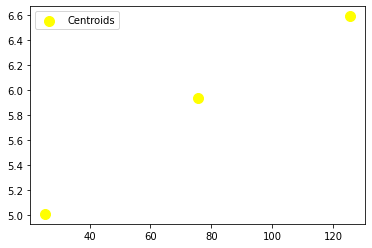

In [22]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Now Combining both the above graphs together

<function matplotlib.pyplot.show(close=None, block=None)>

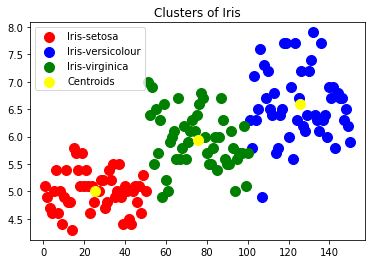

In [25]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

plt.title('Clusters of Iris')
plt.legend()
plt.show